
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>

- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math

c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
seed = np.random.randint(0,1e5)
print(seed)
seed = 46281
# np.random.seed(seed)

67096


# KMeans Algorithm

In [5]:
class Kmeans:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state
        
    def init_clusters(self, X):
        ### Initialize cluster_centers using n_clusters points sampled from data
        rs = np.random.RandomState(self.random_state)
        lis=rs.choice(X.shape[0],self.n_clusters,replace=False)
        self.cluster_centers=X[lis,:]
#         print(self.cluster_centers)

    def init_clusters2(self, X):
        
        rs = np.random.RandomState(self.random_state)
        indices = rs.choice(range(0, self.n_clusters), replace = True, size = X.shape[0])
        mean = []
        for count in range(self.n_clusters):
            mean.append(X[indices == count].mean(axis=0))
#         print(np.array(mean).shape)
        self.cluster_centers = np.concatenate([val[ None, :] for val in mean], axis = 0)
    
    def dist(self, data, centers):
        distance = np.sum((np.array(centers) - data[:, None, :])**2, axis = 2)
        return distance
    
    def init_clusters3(self, X):
        centers = []
    
        # Sample the first point
        rs = np.random.RandomState(self.random_state)
        initial_index = rs.choice(range(X.shape[0]), )
        centers.append(X[initial_index, :].tolist())

        print('max: ', np.max(np.sum((X - np.array(centers))**2)))

        # Loop and select the remaining points
        for i in range(self.n_clusters - 1):
            print(i)
            distance = self.dist(X, np.array(centers))

            if i == 0:
                pdf = distance/np.sum(distance)
                centroid_new = X[rs.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
            else:
                # Calculate the distance of each point from its nearest centroid
                dist_min = np.min(distance, axis = 1)
#     if pdf_method == True:
                pdf = dist_min/np.sum(dist_min)
    # Sample one point from the given distribution
                centroid_new = X[rs.choice(range(X.shape[0]), replace = False, p = pdf)]
#                 else:
#                     index_max = np.argmax(dist_min, axis = 0)
#                     centroid_new = X[index_max, :]
            centers.append(centroid_new.tolist())

        self.cluster_centers = np.array(centers)
    
    def fit(self, X):
        """
        Implement of kMeans algorithm and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        n=X.shape[0]
        self.init_clusters3(X)
#         self.init_clusters2(X)
        max_iter = 5000
        epsilon = 1e-10
        print(epsilon)
        it=0
        
        lab = np.zeros((n,1))
        old_lab = np.zeros((n,1))
        for it in range(max_iter):        
                    
            old_lab = lab
            new_cen=np.zeros(self.cluster_centers.shape)
            new_cen[:,:]=self.cluster_centers[:,:]
            # print(self.cluster_centers)
            ### Update labels for each point
            centres_ex = self.cluster_centers[: , np.newaxis, :]
            lab = np.argmin(np.sum(((X - centres_ex)**2),axis=2), axis=0)
#             print(lab)

            # for i, x in enumerate(data):
            # lb[i] = self.pred(x)
            # print(lb)
            # print(data.shape)
            ### Update cluster centers
            ### Note: If some cluster is empty, do not update the cluster center
            for i in range(self.n_clusters): 
                lis=(lab==i)
                # print(lis.shape)
                if(np.sum(lis)==0):
                    continue
                # print(lis.shape)
                # print(lb.shape)
                # print(data[lis,:].shape)
                # f=np.mean(data[lis,:],axis=1)
                # print(f.shape)
                new_cen[i,:]=np.mean(X[lis,:],axis=0)


        ### Check for convergence
        ### Stop if distance between each of the old and new cluster centers is less than epsilon
            if(np.max(np.sqrt(np.sum((new_cen-self.cluster_centers)**2,axis=1)))<epsilon):
                break 
        
        ### Alternative stopping criteria
#             frac_unchanged = np.sum(old_lab.squeeze() == lab).astype(float)/n
#             if(1 - frac_unchanged<epsilon):
#                 print('Converged!', it)
#                 break
            self.cluster_centers[:,:]=new_cen[:,:]
            
        return it+1, self.cluster_centers

        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X. np
        """
        Y = None
        ## TODO
        
        centres_ex = self.cluster_centers[: , np.newaxis, :]
        Y=np.argmin(np.sum(((X - centres_ex)**2),axis=2), axis=0)
        ## END TODO
        assert Y.shape == (X.shape[0],), "Return Y in expected format"
        return Y

## LOAD DATA 1

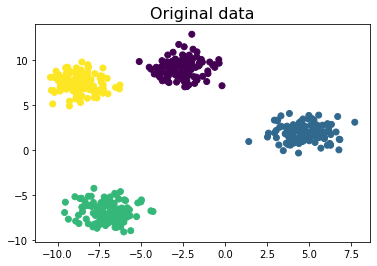

max:  67509.25442638401
0
1
2
1e-10


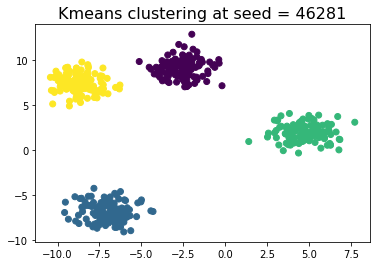

max:  44519.57728552098
0
1
2
1e-10


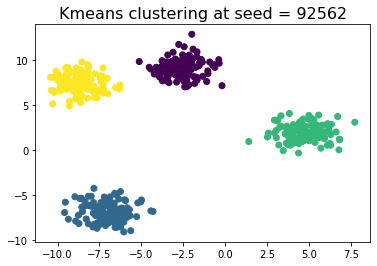

max:  53970.59782634893
0
1
2
1e-10


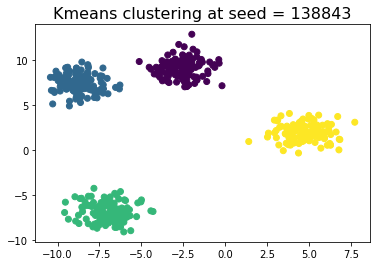

In [11]:
X = np.load('./data/train_X_1.npy')
Y = np.array([np.load('./data/train_Y_1.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Original data', fontsize=16)
plt.show()

plt.figure()

rseed=seed
mi=1000
km = Kmeans(4,rseed)
it, cc=km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
# plt.title('Kmeans clustering at seed = {}\n#Iterations taken = {}'.format(rseed, it), fontsize=16)
plt.title('Kmeans clustering at seed = {}'.format(rseed), fontsize=16)
# for cluster in cc:
#     plt.plot(cluster[0], cluster[1], color='r', marker='o', mew=2)
plt.show()

rseed=seed*2
km = Kmeans(4,rseed)
it, cc=km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
# plt.title('Kmeans clustering at seed = {}\n#Iterations taken = {}'.format(rseed, it), fontsize=16)
plt.title('Kmeans clustering at seed = {}'.format(rseed), fontsize=16)

# for cluster in cc:
#     plt.plot(cluster[0], cluster[1], color='r', marker='o', mew=2)
plt.show()

rseed=seed*3
km = Kmeans(4,rseed)
it, cc=km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
# plt.title('Kmeans clustering at seed = {}\n#Iterations taken = {}'.format(rseed, it), fontsize=16)
plt.title('Kmeans clustering at seed = {}'.format(rseed), fontsize=16)

# for cluster in cc:
#     plt.plot(cluster[0], cluster[1], color='r', marker='o', mew=2)
plt.show()

## LOAD DATA 2

max:  578.0207791289774
0
1e-10


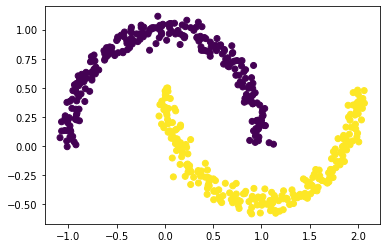

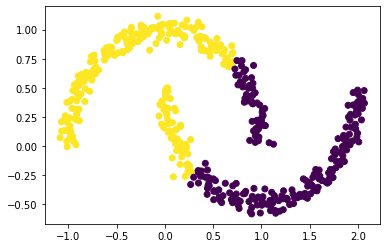

In [7]:
X = np.load('./data/train_X_2.npy')
Y = np.array([np.load('./data/train_Y_2.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

## LOAD DATA 3

max:  799.6354424271194
0
1e-10


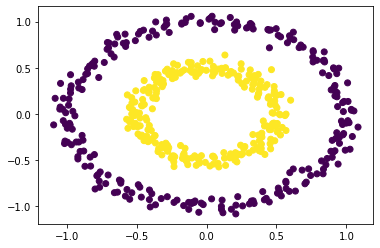

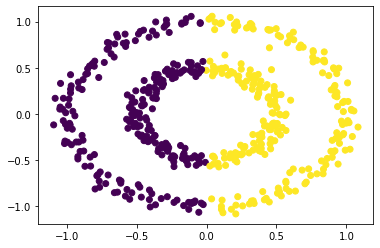

In [8]:
X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

# Simple Kernel Design

In [51]:
from tqdm import notebook

class Kmeans_Kernel:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm 

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state

    def gaussian_kernel(self, X,Y,sigma=0.8):
        '''Returns the gram matrix for a rbf

        Arguments:
        X - numpy array of size n x d
        Y - numpy array of size m x d
        sigma - The sigma value for kernel
        Return:
        K - numpy array of size n x m
        '''
        n = X.shape[0]
        m = Y.shape[0]
        d = X.shape[1]
        # TODO
        rown=np.sum(X**2, axis=1).reshape((n,1))
        coln=np.sum(Y**2, axis=1).reshape((1,m))
        K=-2*(X @ Y.T) 
        K=K+rown+coln
        return np.exp(-1*K/(2*sigma*sigma))
    
    def new_kernel(self, X,Y):
        '''Returns the gram matrix

        Arguments:
        X - numpy array of size n x d
        Y - numpy array of size m x d
        Return:
        K - numpy array of size n x m
        '''
        n = X.shape[0]
        m = Y.shape[0]
        rown=np.linalg.norm(X, axis=1).reshape((n,1))
        colm=np.linalg.norm(Y, axis=1).reshape((1,m))
        K=np.dot(rown, colm)
        return K
    
    def linear_kernel(self,X,Y,sigma=None):
        '''Returns the gram matrix for a linear kernel

        Arguments:
        X - numpy array of size n x d
        Y - numpy array of size m x d
        sigma - dummy argment, don't use
        Return:
        K - numpy array of size n x m
        ''' 
        return X @ Y.T

    def calculate_dist(self, K, dist):#, within_distances, update_within):
        """Compute a n_samples x n_clusters distance matrix using the 
        kernel trick."""
        sw = self.sample_weight_

        for j in range(self.n_clusters):
            mask = self.labels_ == j
            print('jjj', j, K[mask].shape, K[mask][:, mask].shape, K[:, mask].shape)

#             denom = sw[mask].sum()
#             denomsq = denom * denom

#             if update_within:
#                 # KK = K[mask][:, mask]  # K[mask, mask] does not work.
#                 #dist_j = np.sum(np.outer(sw[mask], sw[mask]) * KK / denomsq)
#                 dist_j = np.mean(K[mask][:, mask])
#                 # print('ddd', dist_j, np.mean(KK), np.outer(sw[mask], sw[mask]), denomsq)
#                 within_distances[j] = dist_j
#                 dist[:, j] += dist_j
#             else:
#                 dist[:, j] += within_distances[j]
            dist[:, j] += np.mean(K[mask][:, mask])
            dist[:, j] -= 2*np.mean(K[:, mask], axis=1)
            
            # print(2 * np.sum(sw[mask] * K[:, mask], axis=1) / denom== 2*np.mean(K[:, mask], axis=1))
            
        for i in range(K.shape[0]):
            dist[i, :] += K[i][i]


    def make_zero_centered(self, X):
        """
        Returns a zero-centered concentric circles Dataset

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        X : numpy array of shape (n_samples, 2)
        """
        ## TODO
        mu = np.mean(X, axis=0)
        X -= mu
        
        ## END TODO

        return X
    
    
    def fit(self, X):
        """
        Implement of kMeans algorithm along with using a suitable kernel and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        max_iter = 100
        
        n_samples = X.shape[0]
        
        tol = 1e-10
        X = self.make_zero_centered(X)
        print(X.shape, X.shape)

        K = self.new_kernel(X, X)
        print('k', K.shape)

        sw = np.ones(n_samples)
        self.sample_weight_ = sw

        rs = np.random.RandomState(self.random_state)
        self.labels_ = rs.choice(self.n_clusters,n_samples)
#         print(self.labels_.shape)

        dist = np.zeros((n_samples, self.n_clusters))
        self.within_distances_ = np.zeros(self.n_clusters)
        it=0
        for it in notebook.tqdm(range(max_iter)):
            dist.fill(0)
            self.calculate_dist(K, dist)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)

            # Compute the number of samples whose cluster did not change 
            # since last iteration.
            n_same = np.sum((self.labels_ - labels_old) == 0)
#             if(np.max(np.sqrt(np.sum((labels_old-self.labels_)**2,axis=1)))<tol):
            if 1 - float(n_same) / n_samples < tol:
                break
        self.X_fit_ = X
        return it+1

        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels using the kernel. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X.
        """
        ## TODO
        X = self.make_zero_centered(X)
        print(X.shape, self.X_fit_.shape)
        
        K = self.new_kernel(X, self.X_fit_)
        print('k', K.shape)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self.calculate_dist(K, dist)
        Y= dist.argmin(axis=1)
        return Y

        ## END TODO

(500, 2) (500, 2)
k (500, 500)


jjj 0 (252, 500) (252, 252) (500, 252)
jjj 1 (248, 500) (248, 248) (500, 248)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


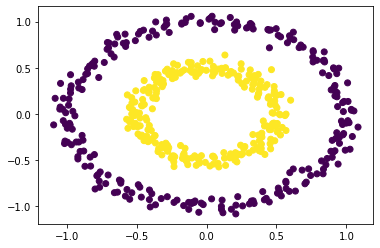

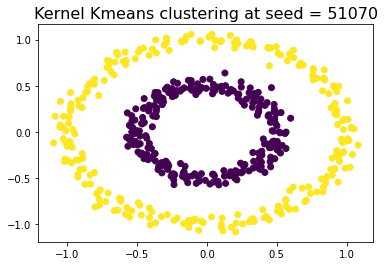

(500, 2) (500, 2)
k (500, 500)


jjj 0 (241, 500) (241, 241) (500, 241)
jjj 1 (259, 500) (259, 259) (500, 259)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


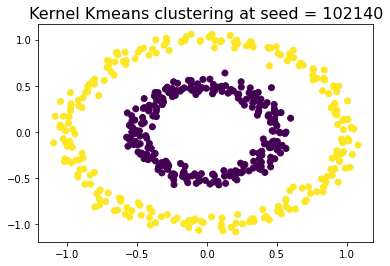

(500, 2) (500, 2)
k (500, 500)


jjj 0 (258, 500) (258, 258) (500, 258)
jjj 1 (242, 500) (242, 242) (500, 242)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


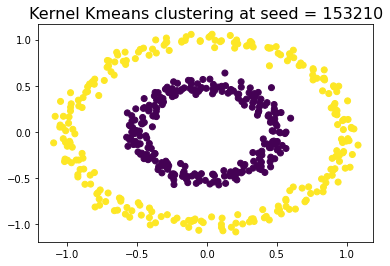

(500, 2) (500, 2)
k (500, 500)


jjj 0 (258, 500) (258, 258) (500, 258)
jjj 1 (242, 500) (242, 242) (500, 242)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


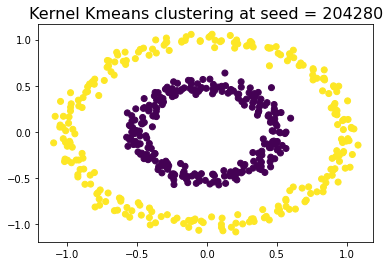

(500, 2) (500, 2)
k (500, 500)


jjj 0 (236, 500) (236, 236) (500, 236)
jjj 1 (264, 500) (264, 264) (500, 264)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


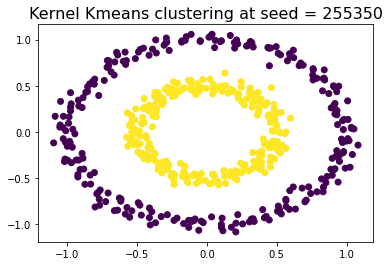

(500, 2) (500, 2)
k (500, 500)


jjj 0 (252, 500) (252, 252) (500, 252)
jjj 1 (248, 500) (248, 248) (500, 248)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


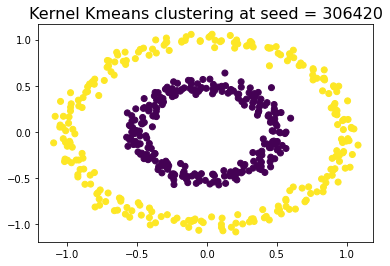

(500, 2) (500, 2)
k (500, 500)


jjj 0 (237, 500) (237, 237) (500, 237)
jjj 1 (263, 500) (263, 263) (500, 263)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


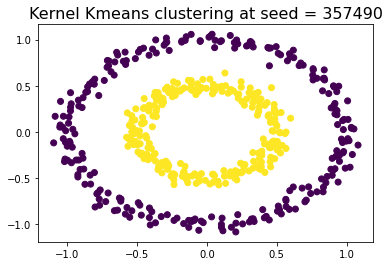

(500, 2) (500, 2)
k (500, 500)


jjj 0 (228, 500) (228, 228) (500, 228)
jjj 1 (272, 500) (272, 272) (500, 272)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


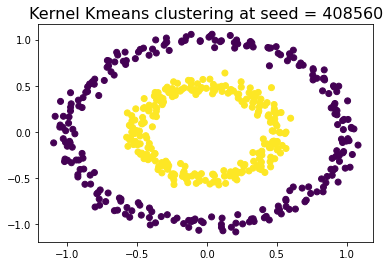

(500, 2) (500, 2)
k (500, 500)


jjj 0 (260, 500) (260, 260) (500, 260)
jjj 1 (240, 500) (240, 240) (500, 240)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


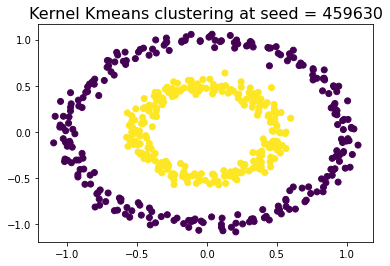

(500, 2) (500, 2)
k (500, 500)


jjj 0 (254, 500) (254, 254) (500, 254)
jjj 1 (246, 500) (246, 246) (500, 246)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


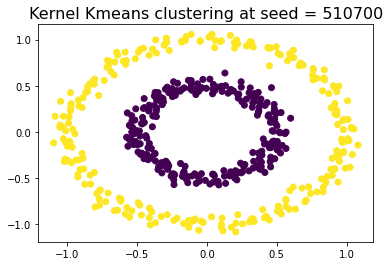

(500, 2) (500, 2)
k (500, 500)


jjj 0 (247, 500) (247, 247) (500, 247)
jjj 1 (253, 500) (253, 253) (500, 253)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


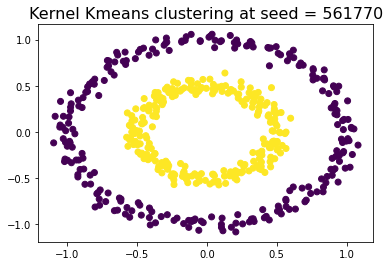

(500, 2) (500, 2)
k (500, 500)


jjj 0 (245, 500) (245, 245) (500, 245)
jjj 1 (255, 500) (255, 255) (500, 255)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


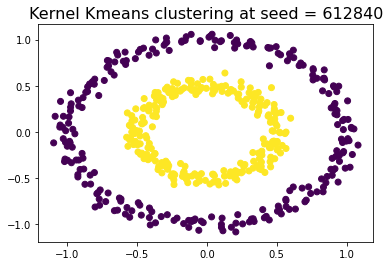

(500, 2) (500, 2)
k (500, 500)


jjj 0 (261, 500) (261, 261) (500, 261)
jjj 1 (239, 500) (239, 239) (500, 239)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


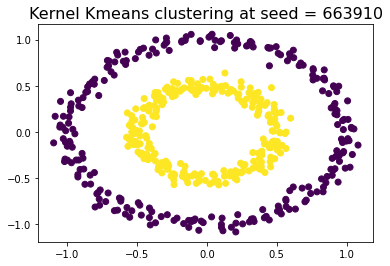

(500, 2) (500, 2)
k (500, 500)


jjj 0 (231, 500) (231, 231) (500, 231)
jjj 1 (269, 500) (269, 269) (500, 269)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


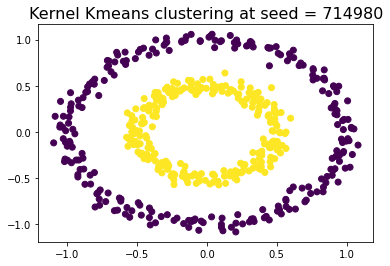

(500, 2) (500, 2)
k (500, 500)


jjj 0 (247, 500) (247, 247) (500, 247)
jjj 1 (253, 500) (253, 253) (500, 253)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


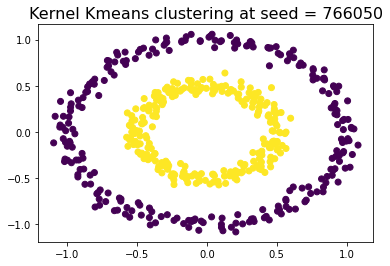

(500, 2) (500, 2)
k (500, 500)


jjj 0 (253, 500) (253, 253) (500, 253)
jjj 1 (247, 500) (247, 247) (500, 247)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


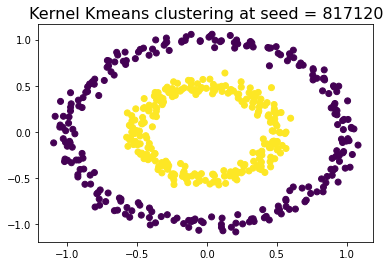

(500, 2) (500, 2)
k (500, 500)


jjj 0 (244, 500) (244, 244) (500, 244)
jjj 1 (256, 500) (256, 256) (500, 256)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


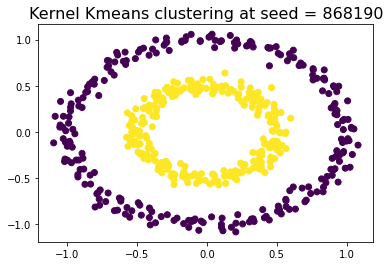

(500, 2) (500, 2)
k (500, 500)


jjj 0 (247, 500) (247, 247) (500, 247)
jjj 1 (253, 500) (253, 253) (500, 253)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


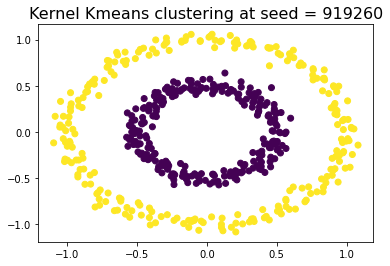

(500, 2) (500, 2)
k (500, 500)


jjj 0 (247, 500) (247, 247) (500, 247)
jjj 1 (253, 500) (253, 253) (500, 253)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


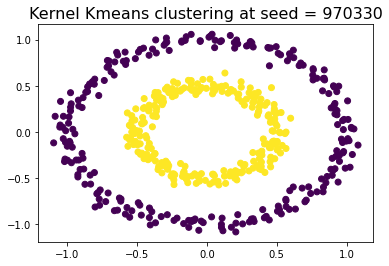

(500, 2) (500, 2)
k (500, 500)


jjj 0 (251, 500) (251, 251) (500, 251)
jjj 1 (249, 500) (249, 249) (500, 249)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


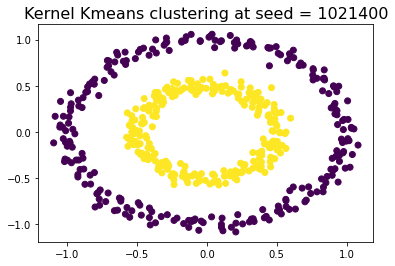

(500, 2) (500, 2)
k (500, 500)


jjj 0 (262, 500) (262, 262) (500, 262)
jjj 1 (238, 500) (238, 238) (500, 238)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


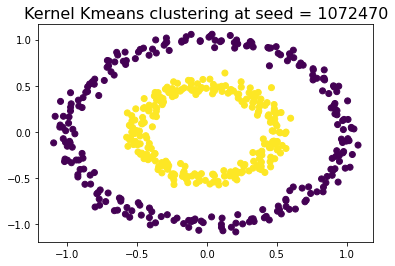

(500, 2) (500, 2)
k (500, 500)


jjj 0 (240, 500) (240, 240) (500, 240)
jjj 1 (260, 500) (260, 260) (500, 260)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


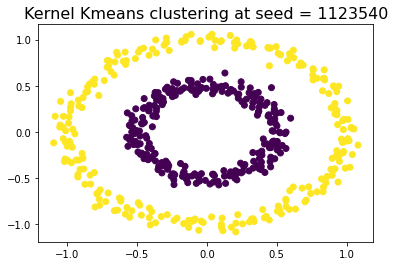

(500, 2) (500, 2)
k (500, 500)


jjj 0 (238, 500) (238, 238) (500, 238)
jjj 1 (262, 500) (262, 262) (500, 262)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


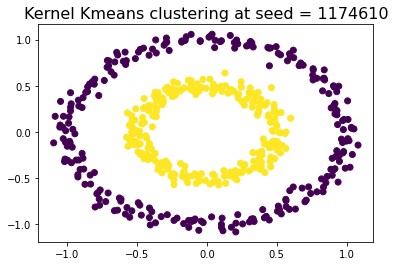

(500, 2) (500, 2)
k (500, 500)


jjj 0 (261, 500) (261, 261) (500, 261)
jjj 1 (239, 500) (239, 239) (500, 239)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


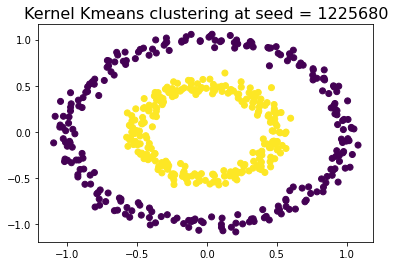

(500, 2) (500, 2)
k (500, 500)


jjj 0 (223, 500) (223, 223) (500, 223)
jjj 1 (277, 500) (277, 277) (500, 277)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


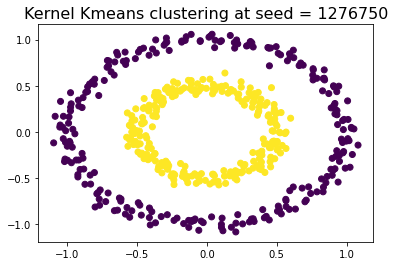

(500, 2) (500, 2)
k (500, 500)


jjj 0 (231, 500) (231, 231) (500, 231)
jjj 1 (269, 500) (269, 269) (500, 269)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


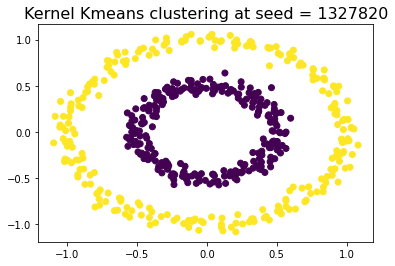

(500, 2) (500, 2)
k (500, 500)


jjj 0 (243, 500) (243, 243) (500, 243)
jjj 1 (257, 500) (257, 257) (500, 257)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


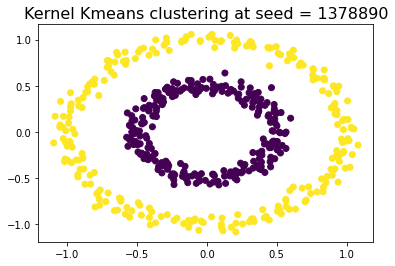

(500, 2) (500, 2)
k (500, 500)


jjj 0 (252, 500) (252, 252) (500, 252)
jjj 1 (248, 500) (248, 248) (500, 248)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


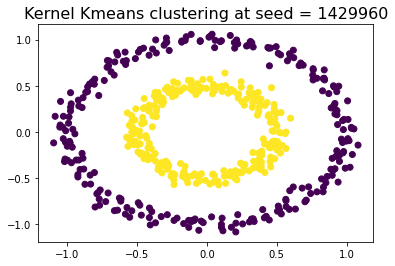

(500, 2) (500, 2)
k (500, 500)


jjj 0 (256, 500) (256, 256) (500, 256)
jjj 1 (244, 500) (244, 244) (500, 244)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


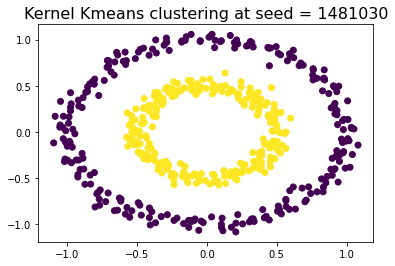

(500, 2) (500, 2)
k (500, 500)


jjj 0 (239, 500) (239, 239) (500, 239)
jjj 1 (261, 500) (261, 261) (500, 261)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


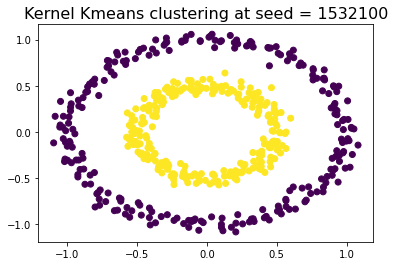

(500, 2) (500, 2)
k (500, 500)


jjj 0 (260, 500) (260, 260) (500, 260)
jjj 1 (240, 500) (240, 240) (500, 240)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


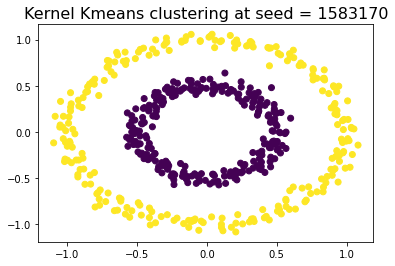

(500, 2) (500, 2)
k (500, 500)


jjj 0 (222, 500) (222, 222) (500, 222)
jjj 1 (278, 500) (278, 278) (500, 278)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


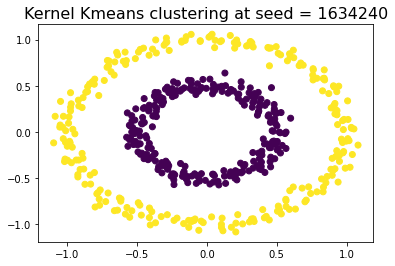

(500, 2) (500, 2)
k (500, 500)


jjj 0 (267, 500) (267, 267) (500, 267)
jjj 1 (233, 500) (233, 233) (500, 233)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


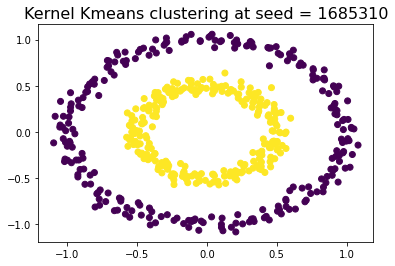

(500, 2) (500, 2)
k (500, 500)


jjj 0 (243, 500) (243, 243) (500, 243)
jjj 1 (257, 500) (257, 257) (500, 257)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


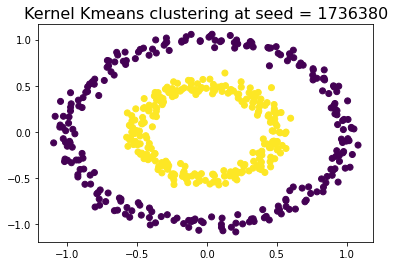

(500, 2) (500, 2)
k (500, 500)


jjj 0 (255, 500) (255, 255) (500, 255)
jjj 1 (245, 500) (245, 245) (500, 245)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


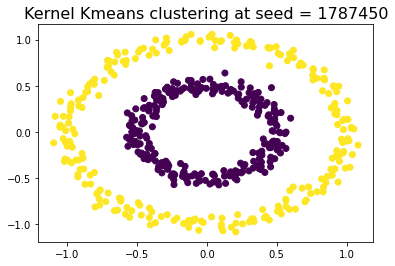

(500, 2) (500, 2)
k (500, 500)


jjj 0 (258, 500) (258, 258) (500, 258)
jjj 1 (242, 500) (242, 242) (500, 242)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


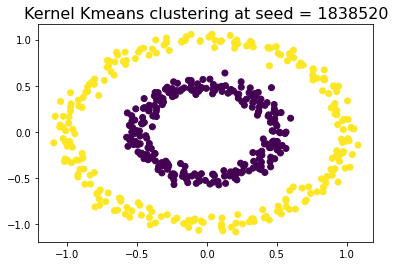

(500, 2) (500, 2)
k (500, 500)


jjj 0 (239, 500) (239, 239) (500, 239)
jjj 1 (261, 500) (261, 261) (500, 261)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


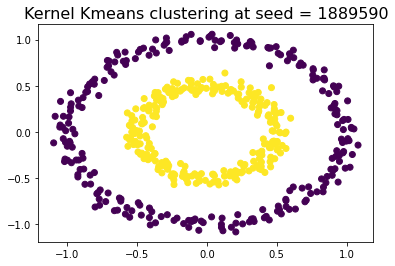

(500, 2) (500, 2)
k (500, 500)


jjj 0 (240, 500) (240, 240) (500, 240)
jjj 1 (260, 500) (260, 260) (500, 260)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


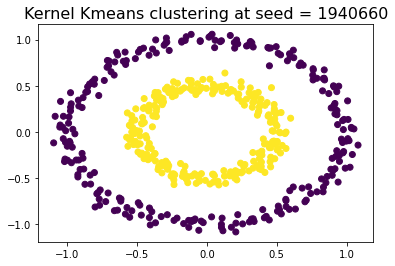

(500, 2) (500, 2)
k (500, 500)


jjj 0 (240, 500) (240, 240) (500, 240)
jjj 1 (260, 500) (260, 260) (500, 260)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)

(500, 2) (500, 2)
k (500, 500)
jjj 0 (250, 500) (250, 250) (500, 250)
jjj 1 (250, 500) (250, 250) (500, 250)


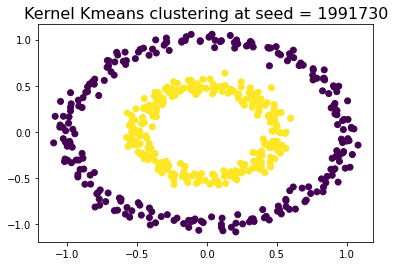

In [52]:
X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

from tqdm import notebook
for rseed in notebook.tqdm(range(seed, seed*40, seed)):
    km = Kmeans_Kernel(2,rseed+1)
    it = km.fit(X)
    y_pred = km.predict(X)
    # print(y_pred)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.title('Kernel Kmeans clustering at seed = {}'.format(rseed), fontsize=16)
    plt.show()

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


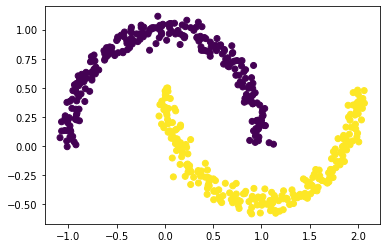

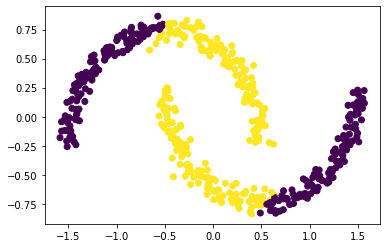

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


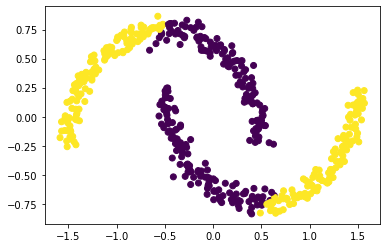

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


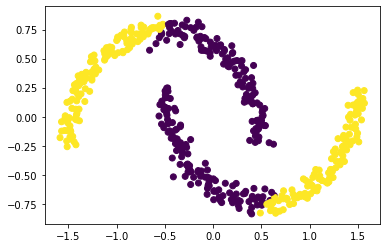

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


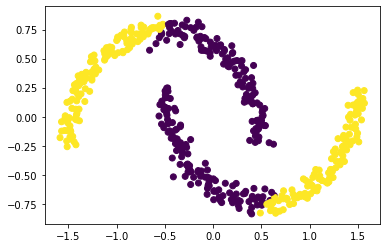

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


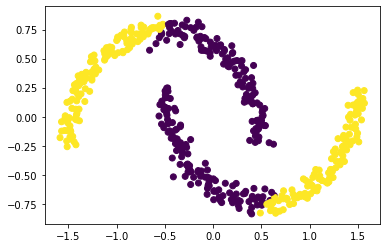

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


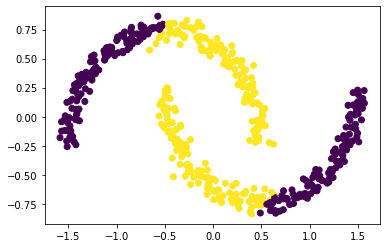

(500, 2) (500, 2)
k (500, 500)



(500, 2) (500, 2)
k (500, 500)


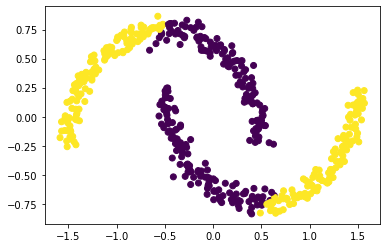

In [28]:
X = np.load('./data/train_X_2.npy')
Y = np.array([np.load('./data/train_Y_2.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

from tqdm import notebook
for i in notebook.tqdm(range(123, 24621679, 3980961)):

    km = Kmeans_Kernel(2,i)
    km.fit(X)
    y_pred = km.predict(X)
    # print(y_pred)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.show()

# Kernelized classification

## 3 a) Gram Matrix

In [19]:
def linear_kernel(X,Y,sigma=None):
	'''Returns the gram matrix for a linear kernel
	
	Arguments:
		X - numpy array of size n x d
		Y - numpy array of size m x d
		sigma - dummy argment, don't use
	Return:
		K - numpy array of size n x m
	''' 
	# TODO 
	# NOTE THAT YOU CANNOT USE FOR LOOPS HERE
	return X @ Y.T
	# END TODO

def gaussian_kernel(X,Y,sigma=0.1):
	'''Returns the gram matrix for a rbf
	
	Arguments:
		X - numpy array of size n x d
		Y - numpy array of size m x d
		sigma - The sigma value for kernel
	Return:
		K - numpy array of size n x m
	'''
	# TODO
	# NOTE THAT YOU CANNOT USE FOR LOOPS HERE 
	s=np.shape(X)
	d=s[1]
	n=s[0]
	s2=np.shape(Y)
	m=s2[0]
	rown=np.sum(X**2,axis=1).reshape((n,1))
	coln=np.sum(Y**2,axis=1).reshape((1,m))
	K=-2*(X @ Y.T) 
	K=K+rown+coln
	return np.exp(-1*K/(2*sigma*sigma))
	# END TODO

## 3 b) Kernel Logistic Regression

In [20]:
class KernelLogistic(object):
    def __init__(self, kernel=gaussian_kernel, iterations=100,eta=0.01,lamda=0.05,sigma=1):
        self.kernel = lambda x,y: kernel(x,y,sigma)
        self.iterations = iterations
        self.alpha = None
        self.eta = eta     # Step size for gradient descent
        self.lamda = lamda # Regularization term

    def fit(self, X, y):
        ''' find the alpha values here'''
        self.train_X = X
        self.train_y = y
        self.alpha = np.zeros((y.shape[0],1))
        kernel = self.kernel(self.train_X,self.train_X)

        # TODO
        
        for _ in range(self.iterations):
            # TODO: Update the weights using a single step of gradient descent. You are not allowed to use loops here.
            # if(iter%1000==0):
            #     print(self.weights)
            sig=1/(1+np.exp(-1*(kernel @ self.alpha)))
            grad=kernel @ (self.train_y[:,None] - sig - self.lamda*self.alpha)
            # print(grad.shape)
            self.alpha=self.alpha+self.eta*grad

        # END TODO
    

    def predict(self, X):
        # TODO 
        
        kernel = self.kernel(X,self.train_X)
        # print(kernel.shape)
        # wt=np.diag(self.alpha[:,0])
        # # print(wt.shape)
        # wt_ker=kernel @ wt
        tmp= 1/(1+np.exp(-1*(kernel @ self.alpha)))
        return tmp[:,0]

        # END TODO

def k_fold_cv(X,y,k=10,sigma=1.0):
    '''Does k-fold cross validation given train set (X, y)
    Divide train set into k subsets, and train on (k-1) while testing on 1. 
    Do this process k times.
    Do Not randomize 
    
    Arguments:
        X  -- Train set
        y  -- Train set labels
    
    Keyword Arguments:
        k {number} -- k for the evaluation
        sigma {number} -- parameter for gaussian kernel
    
    Returns:
        error -- (sum of total mistakes for each fold)/(k)
    '''
    # TODO 
    
    sig=sigma
    n=X.shape[0]
    # print(X.shape,y.shape)
    sz=n//k
    tot=0
    for i in range(k):
        st=i*sz
        end=(i+1)*sz
        if(i==k):
            end=n
        ms=np.ones((n,),dtype=bool)
        ms[st:end]=0
        clf = KernelLogistic(gaussian_kernel,sigma=sig)
        clf.fit(X[ms,:], y[ms])

        y_predict = clf.predict(X[st:end]) > 0.5

        err = np.sum(y_predict != y[st:end])
        tot+=err
        # print(i)

    return tot/k

    # END TODO

## K fold runs

500 out of 500 predictions correct


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


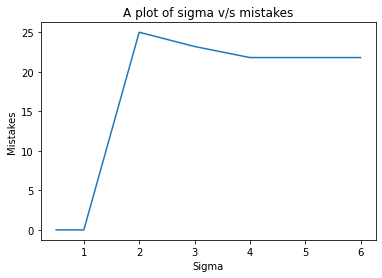

In [21]:
X1 = np.load('./data/train_X_3.npy')
Y1 = np.array([np.load('./data/train_Y_3.npy')]).T
Y1 = np.squeeze(Y1)

clf = KernelLogistic(gaussian_kernel)
clf.fit(X1, Y1)

y_predict = clf.predict(X1) > 0.5

correct = np.sum(y_predict == Y1)
print("%d out of %d predictions correct" % (correct, len(y_predict)))

errs = []
sigmas = [0.5, 1, 2, 3, 4, 5, 6]
for s in sigmas:  
    errs+=[(k_fold_cv(X1,Y1,sigma=s))]
plt.plot(sigmas,errs)
plt.xlabel('Sigma')
plt.ylabel('Mistakes')
plt.title('A plot of sigma v/s mistakes')
plt.show()